# **Assignment 1**, **dataset 2**


# Problem statement

Statlog (German Credit Data)

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data <-- Refer to the documentation for the details that are not mentioned here

This dataset classifies people described by a set of attributes as good or bad credit risks. The dataset uses codes to describe the categorigal attributes. Make sure to deal with those appropriatelly. See the documentation link above.

Cost Matrix

This dataset requires use of a cost matrix (see below)




|   | 1 | 2 |
|---|---|---|
| 1 | 0 | 1 |
| 2 | 5 | 0 |

(1 = Good,  2 = Bad)

the rows represent the actual classification and the columns
the predicted classification.

It is worse to class a customer as good when they are bad (cost 5),
than it is to class a customer as bad when they are good (cost 1).

Make sure to include this information when reporting your results


### Loading the dataset

In [ ]:
!pip install ucimlrepo

In [91]:
# You are free to use this code snippet in your Python environment or download the dataset manually and load into the notebook.
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = credit_data.data.features
y = credit_data.data.targets

# metadata
print(credit_data.metadata)

# variable information
print(credit_data.variables)

# Make sure to split the data for validation

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

## **Exploratory Data Analysis**

The student will have to make a written analysis of the data being loaded (depending on the dataset that was assigned to them). They should apply methods of inspecting the data and make some exploratory data analysis

In [8]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [100]:
# since the data columns are called attribute 1, 2, 3, etc. I first rename the columns so I can make sense out of them durign EDA.
print(credit_data.variables["description"])
print(credit_data.variables["name"])
name_map = dict(zip(credit_data.variables['name'], credit_data.variables['description']))
X = X.rename(columns=name_map)

0                   Status of existing checking account
1                                              Duration
2                                        Credit history
3                                               Purpose
4                                         Credit amount
5                                 Savings account/bonds
6                              Present employment since
7     Installment rate in percentage of disposable i...
8                               Personal status and sex
9                            Other debtors / guarantors
10                              Present residence since
11                                             Property
12                                                  Age
13                              Other installment plans
14                                              Housing
15              Number of existing credits at this bank
16                                                  Job
17    Number of people being liable to provide m

In [101]:
print(X.columns)
shortened_names = {
    'Installment rate in percentage of disposable income': 'Installment rate',
    'Number of existing credits at this bank': 'No credits',
    'Number of people being liable to provide maintenance for': 'No Dependents'
}
X = X.rename(columns=shortened_names)

Index(['Status of existing checking account', 'Duration', 'Credit history',
       'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age', 'Other installment plans',
       'Housing', 'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker'],
      dtype='object')


In [60]:
X.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,No credits,Job,No Dependents,Telephone,foreign worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [61]:
X.info() # no nan values --> good, we have 7 numerical columns/attributed and 13 categorical/other
# We can see already that the customers telephone number is not relevant for predicting whether the person is a good or bad credit risk.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Status of existing checking account  1000 non-null   object
 1   Duration                             1000 non-null   int64 
 2   Credit history                       1000 non-null   object
 3   Purpose                              1000 non-null   object
 4   Credit amount                        1000 non-null   int64 
 5   Savings account/bonds                1000 non-null   object
 6   Present employment since             1000 non-null   object
 7   Installment rate                     1000 non-null   int64 
 8   Personal status and sex              1000 non-null   object
 9   Other debtors / guarantors           1000 non-null   object
 10  Present residence since              1000 non-null   int64 
 11  Property                             1000 no

In [62]:
X.describe() # inspect the numerical values. For scale sensitive algorithms normalization might be applicable.

,Duration,Credit amount,Installment rate,Present residence since,Age,No credits,No Dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


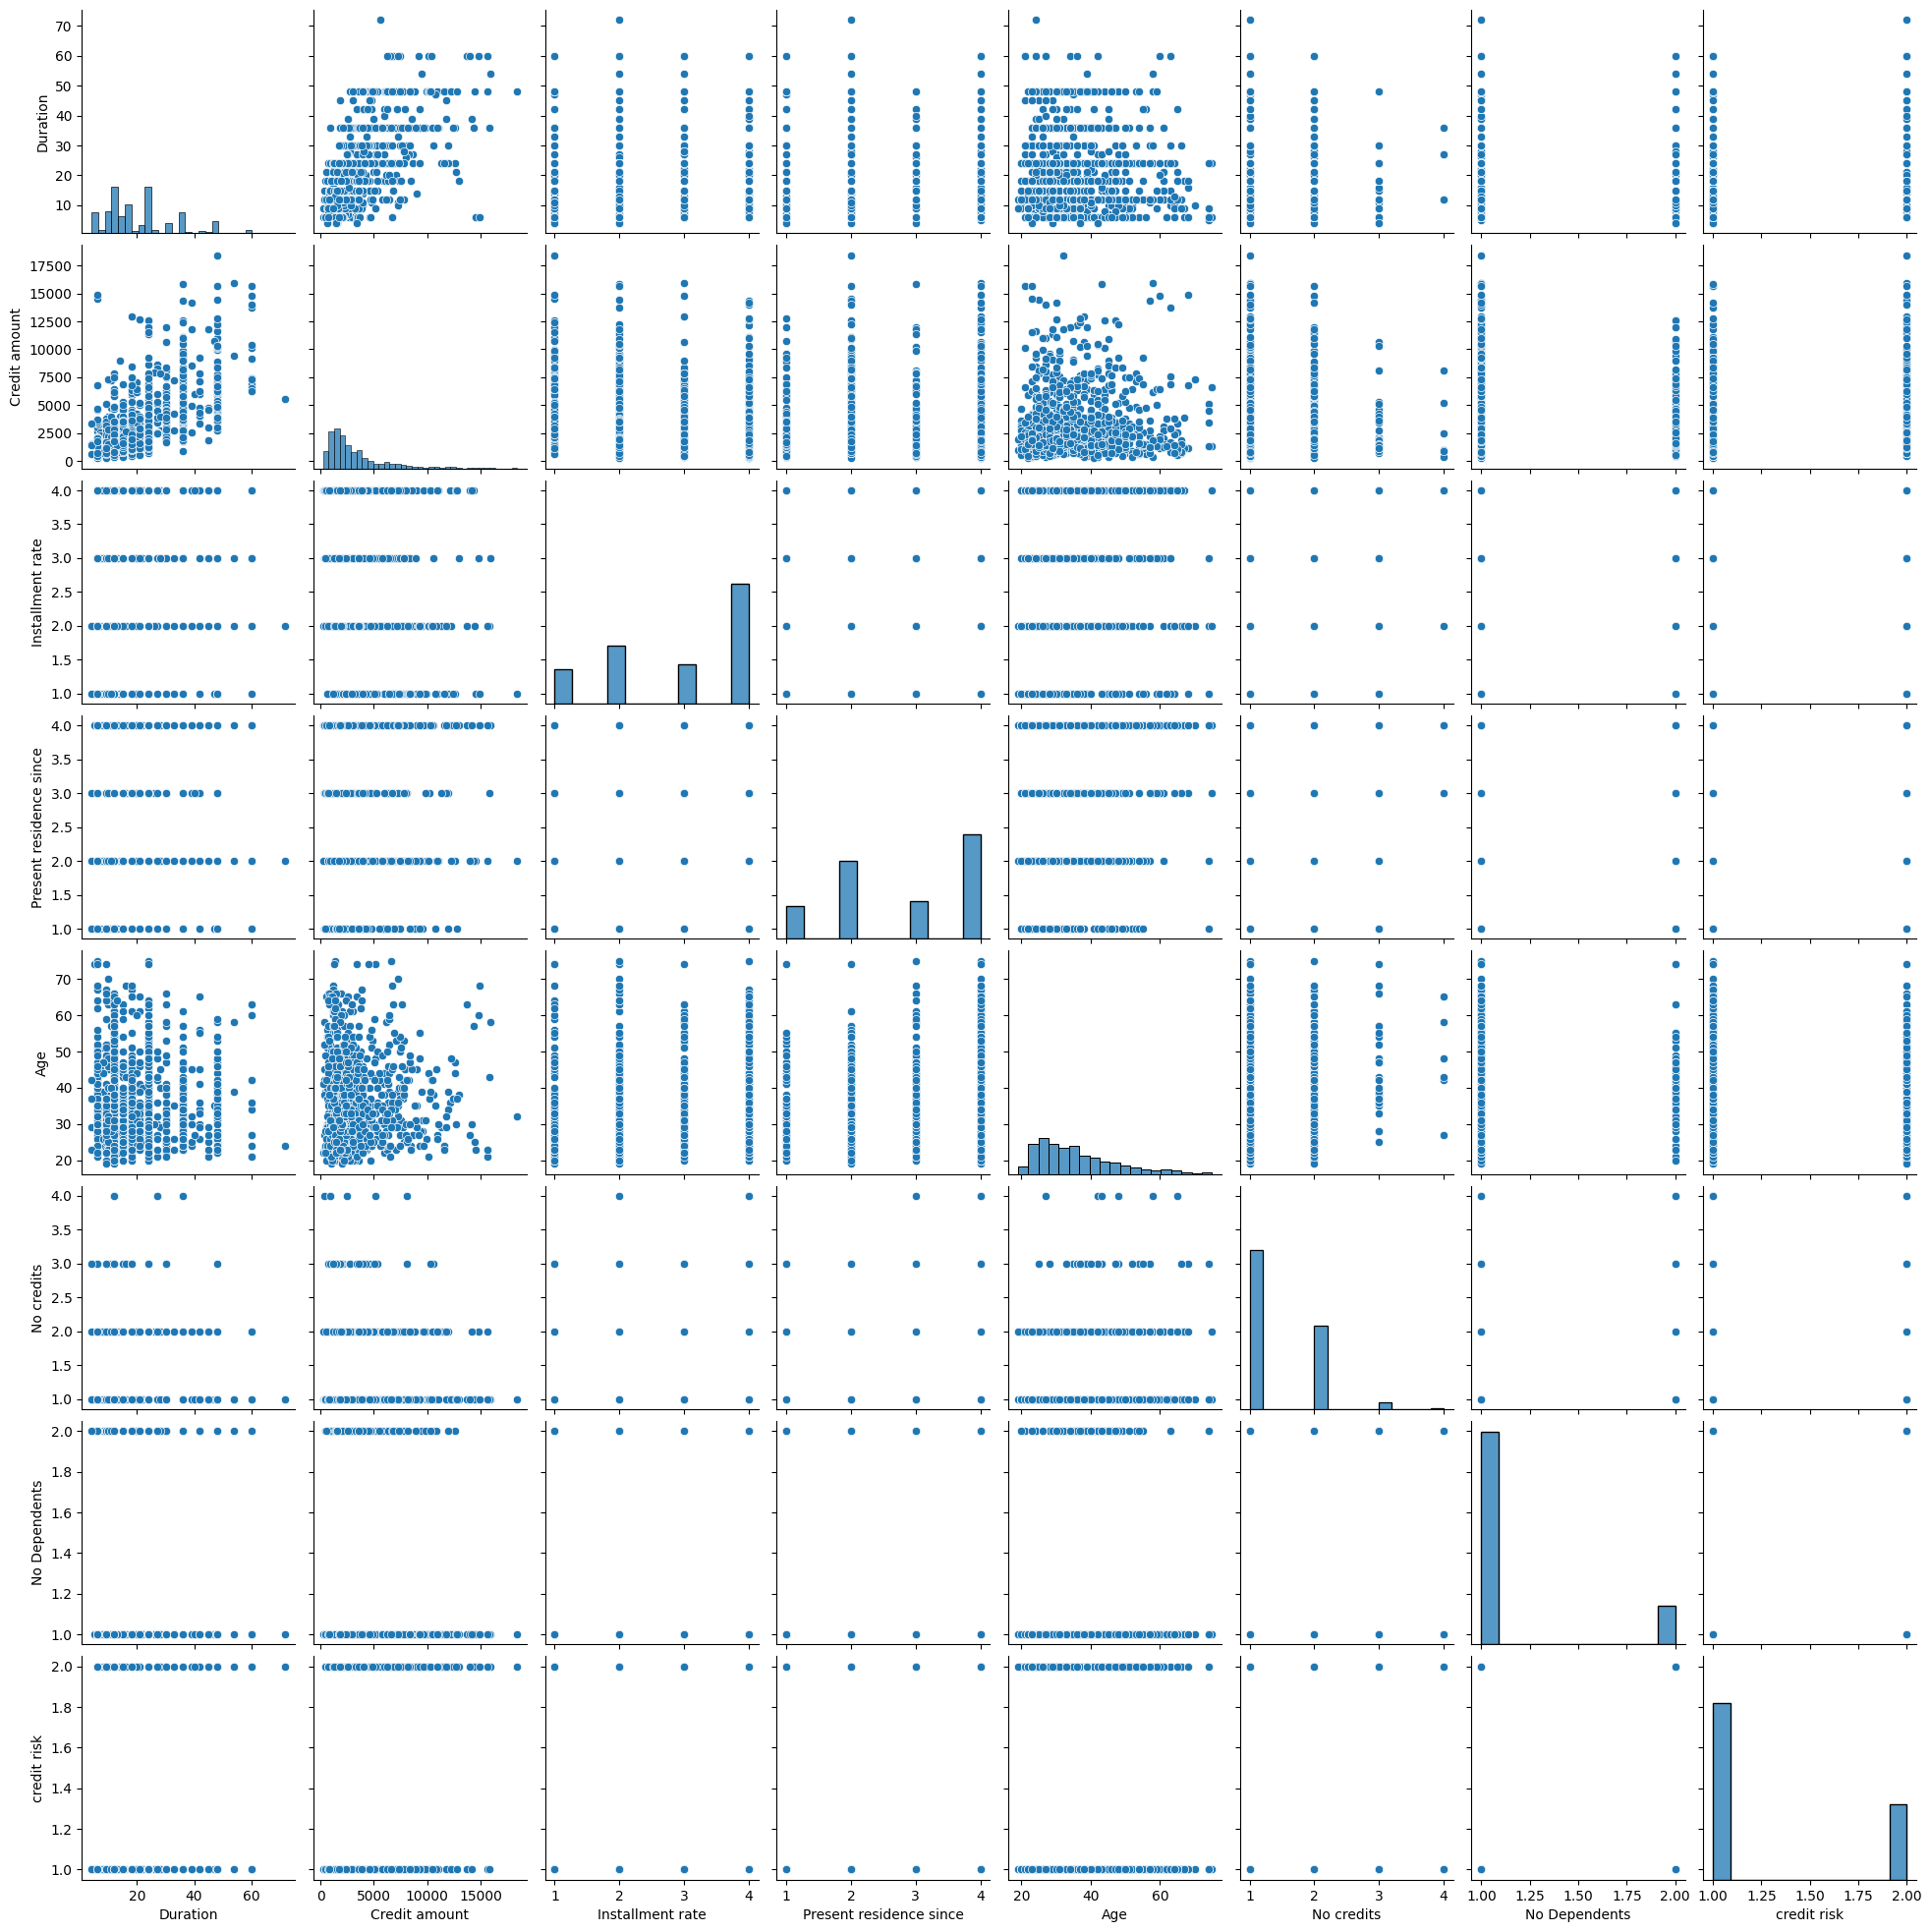

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
df = X.copy()
df['credit risk'] = y["class"]
#sns.pairplot(df, hue="target")
sns.pairplot(df)
plt.show()

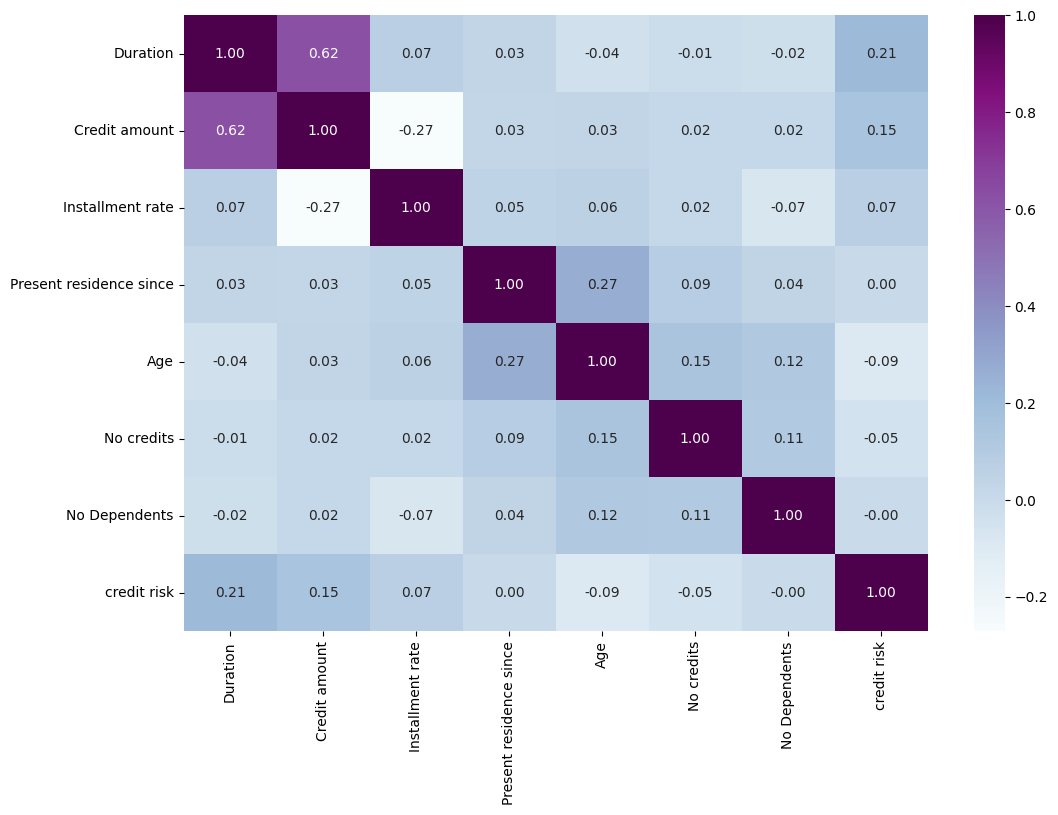

In [78]:
numeric_df = df.select_dtypes(include='number') # HOW TO ANALYSE TARGET THOUGH? Because 1 is good, 2 is bad.
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.show()

In [ ]:
# Check out the categorical values as well

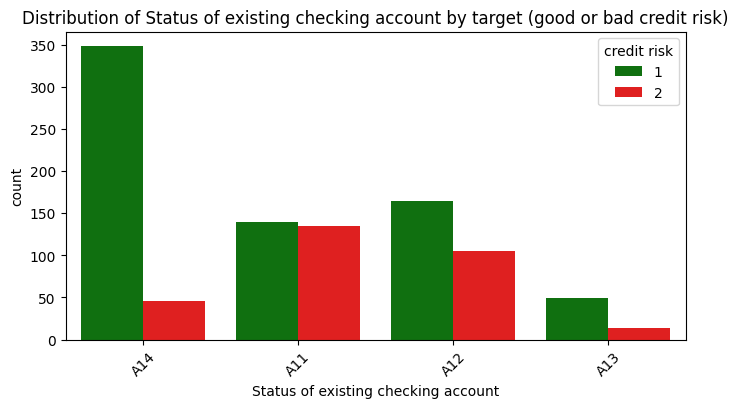

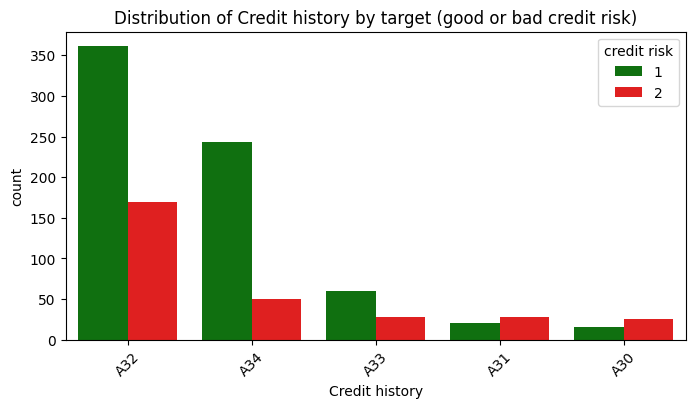

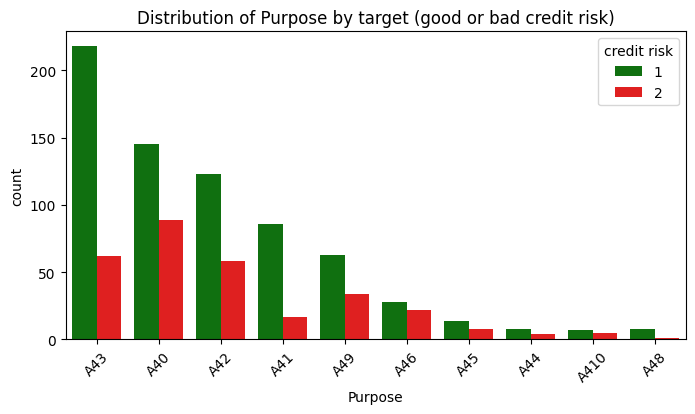

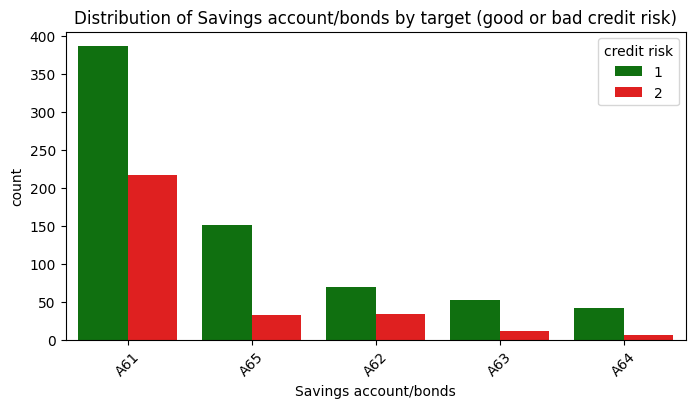

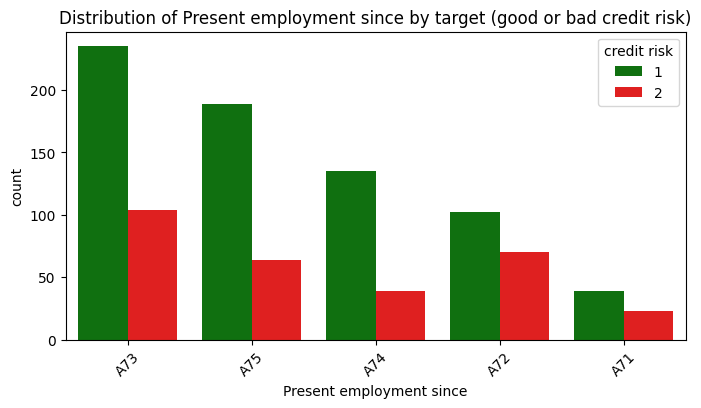

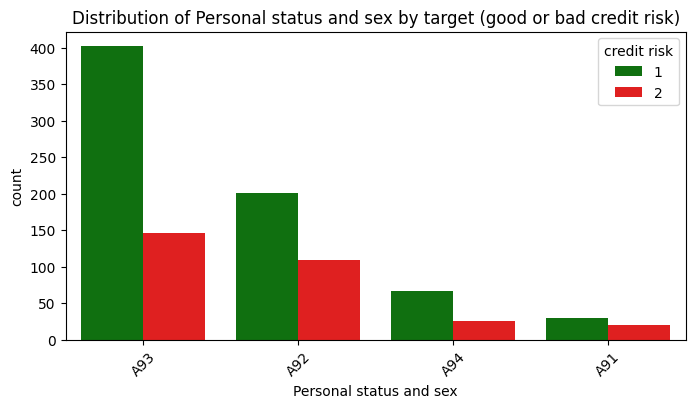

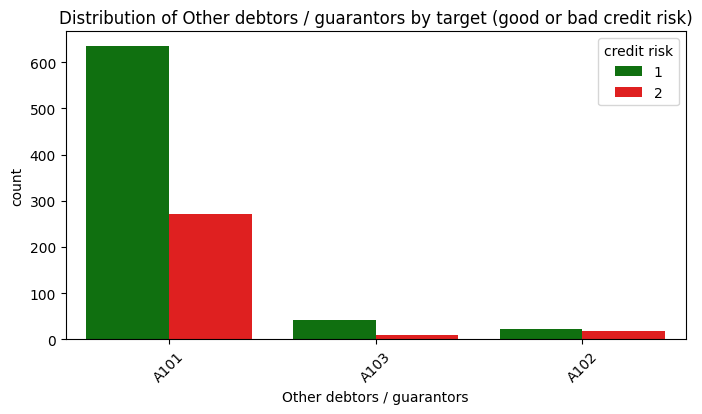

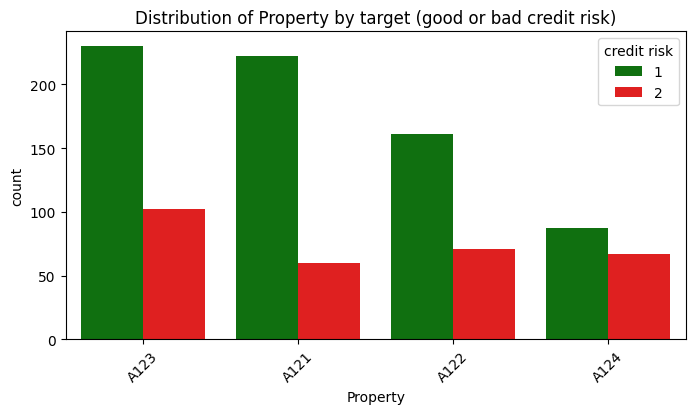

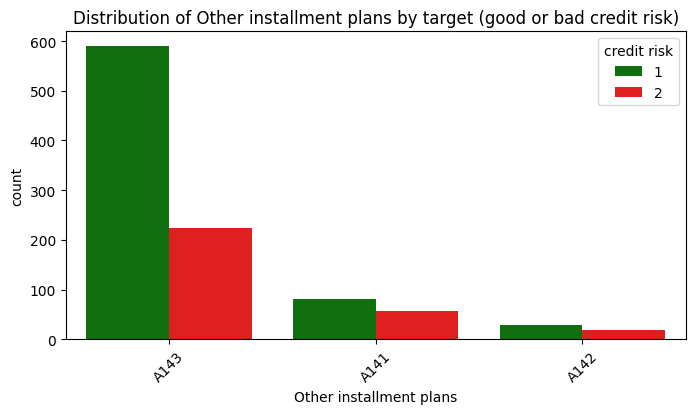

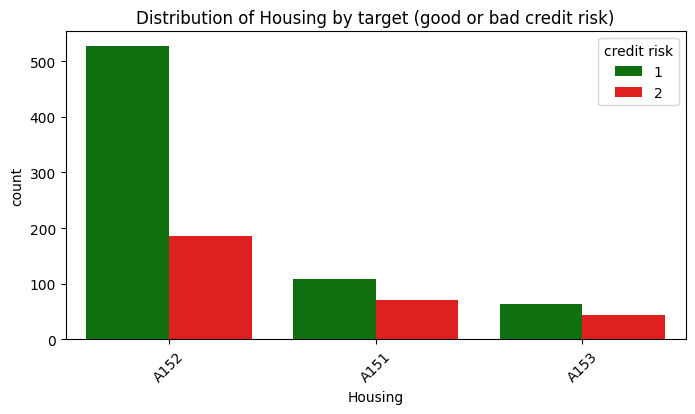

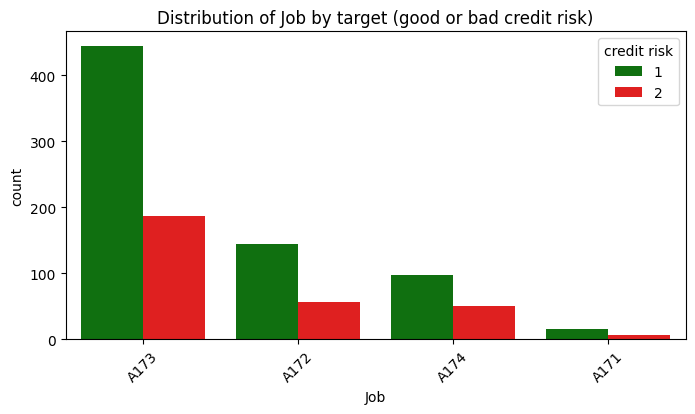

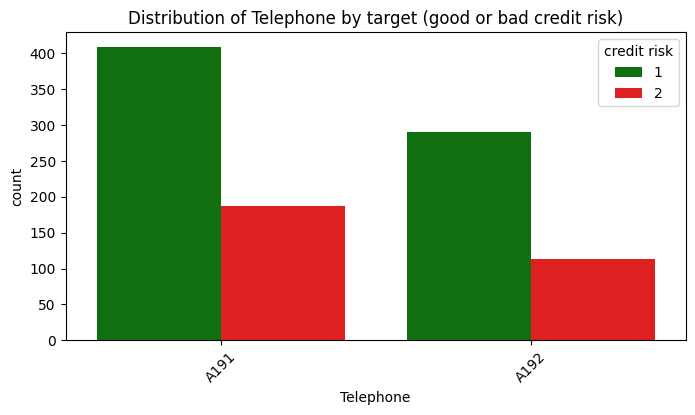

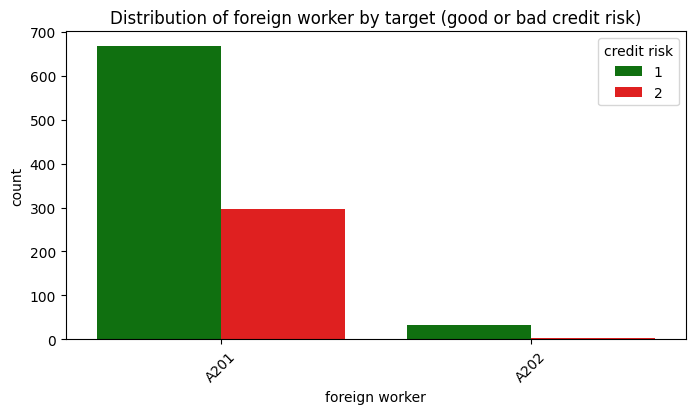

In [80]:
palette = {1: 'green', 2: 'red'}

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='credit risk', data=df, order=df[col].value_counts().index, palette=palette)
    plt.title(f"Distribution of {col} by target (good or bad credit risk)")
    plt.xticks(rotation=45)
    plt.show()

In [131]:
# CHECK WHICH COLUMNS TO DROP
from scipy.stats import chi2_contingency

for col in df.select_dtypes(include='object').columns:
    contingency_table = pd.crosstab(df[col], df['credit risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {col}")
    print(f"  Chi2 statistic: {chi2:.2f}")
    print(f"  p-value: {p:.4f}")
    if p < 0.05:
        print("  --> Likely relevant (reject null hypothesis of independence)\n")
    else:
        print("  --> Likely not relevant (fail to reject null hypothesis)\n")

Feature: Status of existing checking account
  Chi2 statistic: 123.72
  p-value: 0.0000
  --> Likely relevant (reject null hypothesis of independence)

Feature: Credit history
  Chi2 statistic: 61.69
  p-value: 0.0000
  --> Likely relevant (reject null hypothesis of independence)

Feature: Purpose
  Chi2 statistic: 33.36
  p-value: 0.0001
  --> Likely relevant (reject null hypothesis of independence)

Feature: Savings account/bonds
  Chi2 statistic: 36.10
  p-value: 0.0000
  --> Likely relevant (reject null hypothesis of independence)

Feature: Present employment since
  Chi2 statistic: 18.37
  p-value: 0.0010
  --> Likely relevant (reject null hypothesis of independence)

Feature: Personal status and sex
  Chi2 statistic: 9.61
  p-value: 0.0222
  --> Likely relevant (reject null hypothesis of independence)

Feature: Other debtors / guarantors
  Chi2 statistic: 6.65
  p-value: 0.0361
  --> Likely relevant (reject null hypothesis of independence)

Feature: Property
  Chi2 statistic: 23.

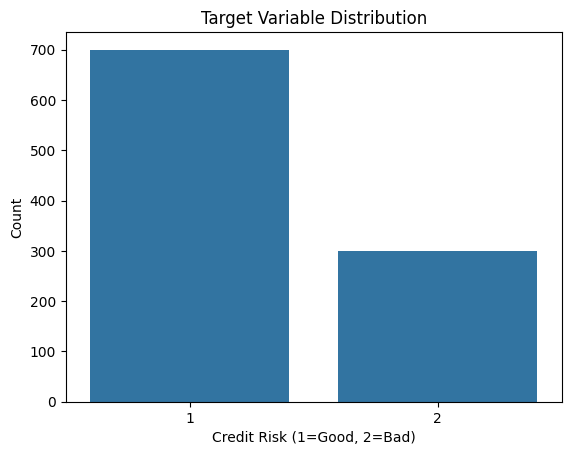

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y["class"])
plt.title("Target Variable Distribution")
plt.xlabel("Credit Risk (1=Good, 2=Bad)")
plt.ylabel("Count")
plt.show()
# y.value_counts()

## **Data Preprocessing**:

If applicable, the student will create new features from existing data to improve model performance and/or select the most relevant features for the model.

-  Drop columns that represent noise
- convert labels for binary classification
- create new features?
- augmentation more applicable to images or text, here, i would not do it. Might be worth trying out undersampling because target classes are imbalanced.

In [132]:
# convert labels for binary classification
print(y["class"].unique())
y["class"] = y["class"].replace(2, 0)
print(y["class"].unique())

# drop Telephone column
X.drop('Telephone', axis=1, inplace=True)

[1 0]
[1 0]


/tmp/ipython-input-2593378368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].replace(2, 0)


## **Data Transformation**

The student should prepare the data for the training. Augmenting, splitting, and otherwise transforming should be done here.

- splitting
- scaling
- converting catergorical to numerical

In [133]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.compose import ColumnTransformer

# converting categorical to numerical values and scale numerical values
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns # we want to scale only the numerical values


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)
X_transformed.shape

(1000, 59)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_train shape:", y_train.shape)
print("y_eval shape:", y_eval.shape)


X_train_processed = preprocessor.transform(X_train)
X_eval_processed = preprocessor.transform(X_eval)

X_train shape: (800, 19)
X_eval shape: (200, 19)
y_train shape: (800, 1)
y_eval shape: (200, 1)


## **Model Selection**


The student should implement a simple model as a baseline to compare more complex models. The student should try more complex modes and justify their rejection or acceptance.

As a simple baseline I chose logistic regression since ...
As a more complex model I chose
I did not choose a neural network since the data is a rather small data set (1000 rows) and it would be an overkill.

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_processed, y_train)

NameError: name 'X_train_processed' is not defined

In [136]:
print("Train score:", model.score(X_train_processed, y_train))
print("Eval score:", model.score(X_eval_processed, y_eval))

Train score: 0.77625
Eval score: 0.8


151
49
Accuracy: 0.8
Precision: 0.8344370860927153
[[ 34  25]
 [ 15 126]]
Total Misclassification Cost: 140


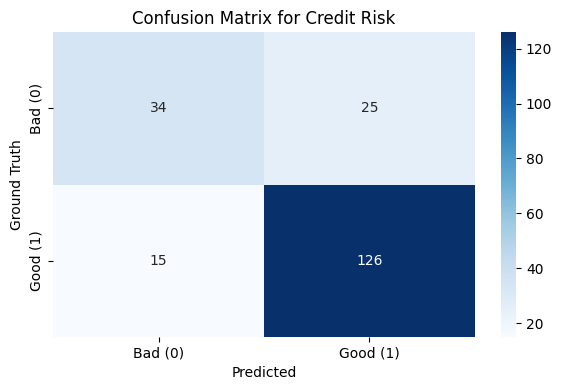

In [137]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_eval_processed)
print(np.sum(y_pred == 1))
print(np.sum(y_pred == 0))
acc = accuracy_score(y_eval, y_pred)
print("Accuracy:", acc)
precision = precision_score(y_eval, y_pred, pos_label=1)  # or pos_label=0 depending on your target
print("Precision:", precision)

cm = confusion_matrix(y_eval, y_pred)
print(cm)

tn, fp, fn, tp = cm.ravel()

total_cost = (fp * 5) + (fn * 1)
print("Total Misclassification Cost:", total_cost)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad (0)", "Good (1)", ], yticklabels=["Bad (0)", "Good (1)"])
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix for Credit Risk')
plt.tight_layout()
plt.show()

# The model is predicting in 26 cases that the person poses no credit risk even though the person does, and FPs are more costly. This might be due to imbalanced data set or because some features introduced noise.
# We also see that half of the bad credit risk are classified as good which has high cost...

## **Reporting the results**

The student should report the results. Identify which features are most influential in the model’s predictions, if applicable for the dataset and model used.

In [1]:

coefficients = model.coef_ # check coefficients of the model to check which features are most important
print(coefficients)

NameError: name 'model' is not defined

**Extra**: Any additional discussion and extra work relevant for solving the problem is welcome by the student and will contribute to a better grade.